In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GRU, SimpleRNN
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras.layers import BatchNormalization

In [5]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# pad_sequence to have same length
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [7]:
len(X_train)

25000

**Simple RNN**

In [20]:
model = Sequential([
    Embedding(10000, 32, input_shape=(100,)),
    SimpleRNN(5, return_sequences=False),
    Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 5)                   │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,196 (1.22 MB)

 Trainable params: 320,196 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5460 - loss: 0.6820 - val_accuracy: 0.6104 - val_loss: 0.6402
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7476 - loss: 0.5160 - val_accuracy: 0.7841 - val_loss: 0.4778
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8616 - loss: 0.3402 - val_accuracy: 0.7519 - val_loss: 0.5381
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9068 - loss: 0.2521 - val_accuracy: 0.7960 - val_loss: 0.5055
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9403 - loss: 0.1798 - val_accuracy: 0.7907 - val_loss: 0.5316


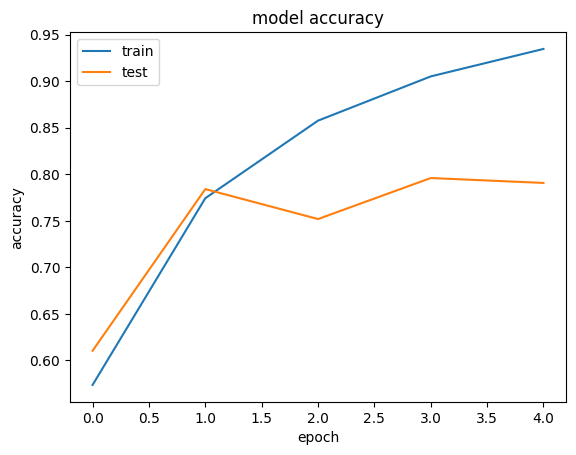

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

**Deep RNN**

In [15]:
# RNN Model
model = Sequential([
    Embedding(10000, 32, input_shape=(100,)),
    SimpleRNN(5, return_sequences=True),
    SimpleRNN(5),
    Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 100, 5)              │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,251 (1.22 MB)

 Trainable params: 320,251 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.5549 - loss: 0.6808 - val_accuracy: 0.7604 - val_loss: 0.5265
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.7782 - loss: 0.4877 - val_accuracy: 0.7890 - val_loss: 0.4717
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8400 - loss: 0.3788 - val_accuracy: 0.7770 - val_loss: 0.5009
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9014 - loss: 0.2720 - val_accuracy: 0.7549 - val_loss: 0.5474
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9228 - loss: 0.2149 - val_accuracy: 0.7720 - val_loss: 0.5723


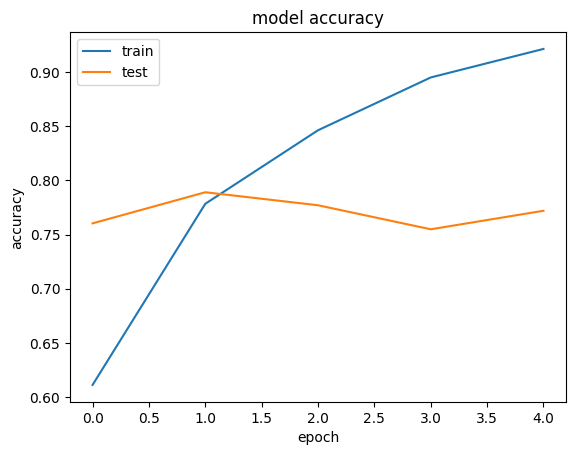

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

**LSTM**

In [24]:
model = Sequential()
model.add(Embedding(10000, 32, input_shape=(100,)))
model.add(LSTM(5, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 5)                   │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,766 (1.22 MB)

 Trainable params: 320,766 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7122 - loss: 0.5640 - val_accuracy: 0.8316 - val_loss: 0.3951
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8904 - loss: 0.2952 - val_accuracy: 0.8488 - val_loss: 0.3537
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9243 - loss: 0.2158 - val_accuracy: 0.8453 - val_loss: 0.3740
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9472 - loss: 0.1593 - val_accuracy: 0.8388 - val_loss: 0.4511
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9573 - loss: 0.1279 - val_accuracy: 0.8358 - val_loss: 0.4351


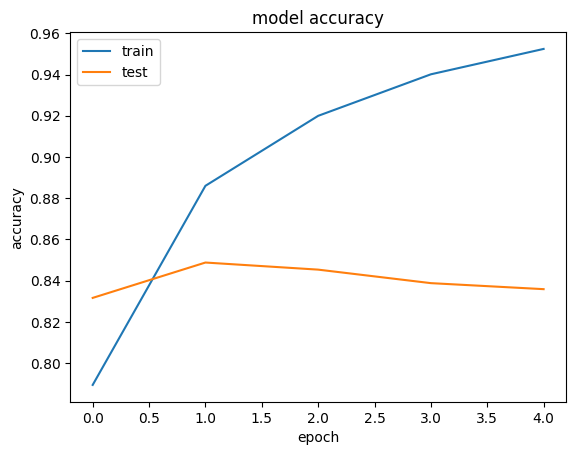

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

**Stacked LSTM**

In [50]:
model = Sequential()
model.add(Embedding(10000, 32, input_shape=(100,)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(BatchNormalization())
model.add(Dropout(0.02))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 64)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 100, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,433 (1.44 MB)

 Trainable params: 378,177 (1.44 MB)

 Non-trainable params: 256 (1.00 KB)

In [51]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7052 - loss: 0.5563 - val_accuracy: 0.7356 - val_loss: 0.7292
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8731 - loss: 0.3104 - val_accuracy: 0.8084 - val_loss: 0.4559
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9089 - loss: 0.2308 - val_accuracy: 0.8340 - val_loss: 0.4068
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9355 - loss: 0.1714 - val_accuracy: 0.8298 - val_loss: 0.4691
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9520 - loss: 0.1349 - val_accuracy: 0.8161 - val_loss: 0.5168


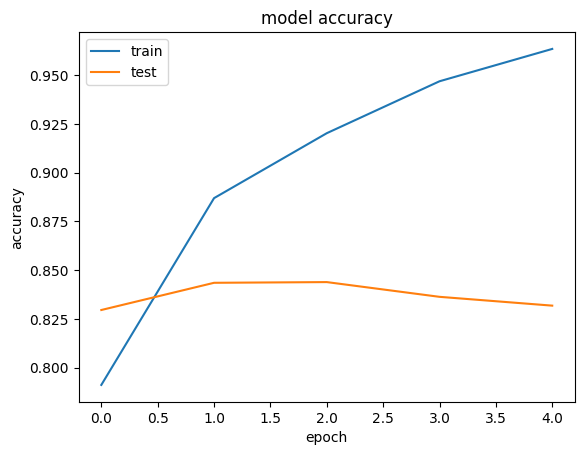

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

**GRU**

In [32]:
model = Sequential([
    Embedding(10000, 32, input_shape=(100,)),
    GRU(5, return_sequences=False),
    Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 5)                   │             585 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,591 (1.22 MB)

 Trainable params: 320,591 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.6599 - loss: 0.5990 - val_accuracy: 0.8396 - val_loss: 0.3775
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8812 - loss: 0.3009 - val_accuracy: 0.8459 - val_loss: 0.3583
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9203 - loss: 0.2179 - val_accuracy: 0.8478 - val_loss: 0.3612
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9429 - loss: 0.1621 - val_accuracy: 0.8370 - val_loss: 0.4354
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9634 - loss: 0.1146 - val_accuracy: 0.8359 - val_loss: 0.4899


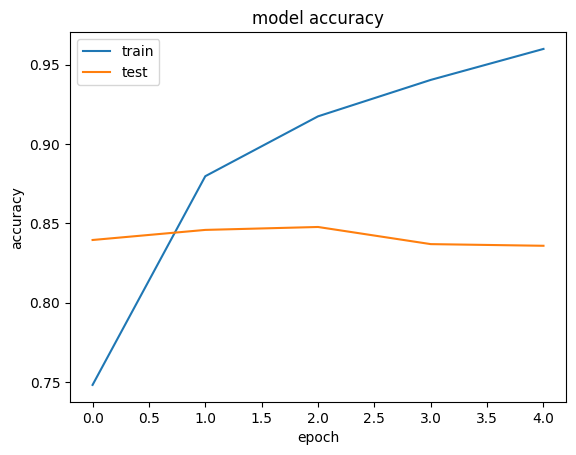

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

**Stacked GRU**

In [46]:
model = Sequential([
    Embedding(10000, 32, input_shape=(100,)),
    Dropout(0.5),
    GRU(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    GRU(64),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 100, 64)             │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364,353 (1.39 MB)

 Trainable params: 364,097 (1.39 MB)

 Non-trainable params: 256 (1.00 KB)

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.5642 - loss: 0.7784 - val_accuracy: 0.6022 - val_loss: 1.1009
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8367 - loss: 0.3812 - val_accuracy: 0.7985 - val_loss: 0.4836
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8833 - loss: 0.2926 - val_accuracy: 0.8130 - val_loss: 0.4461
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9056 - loss: 0.2393 - val_accuracy: 0.8392 - val_loss: 0.3746
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9189 - loss: 0.2129 - val_accuracy: 0.8437 - val_loss: 0.3948


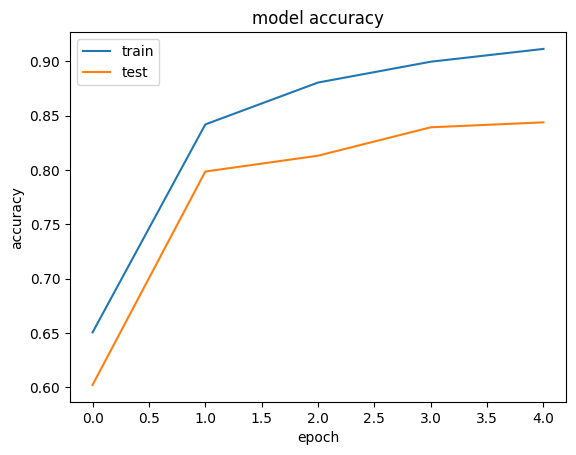

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])